In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install git+https://github.com/tensorflow/docs # Use some functions from tensorflow_docs
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

path="/content/drive/MyDrive/DataSet/final_data_colors.csv"
dataset=pd.read_csv(path)


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-b97o8ga3
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-b97o8ga3
  Resolved https://github.com/tensorflow/docs to commit 05efbeb489102ffd8c131a0da118c43dfe13c82f
  Preparing metadata (setup.py) ... done


# One Hot Encoding

In [ ]:
dataset = pd.get_dummies(dataset, columns=['label'])
dataset.head()

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=8) #train_dataset = 80% of total dataset
#random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset


,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
4185,189,148,192,0,0,0,0,0,0,0,1,0,0,0
3378,178,251,22,0,0,0,0,0,0,0,0,0,0,1
2744,54,9,125,0,1,0,0,0,0,0,0,0,0,0
968,119,147,60,0,0,0,1,0,0,0,0,0,0,0
2286,230,161,233,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,223,157,205,0,0,0,0,0,0,0,1,0,0,0
3707,203,8,10,0,0,0,0,0,0,0,0,1,0,0
881,154,153,123,0,0,0,0,1,0,0,0,0,0,0
1352,151,141,236,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T


In [ ]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T


In [ ]:
from keras import regularizers #regularizers performs regularization which is used to reduce Overfitting
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 12        
                                                                 
 dense_6 (Dense)             (None, 24)                96        
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 16)                400       
                                                                 
 dense_9 (Dense)             (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x=train_dataset, y=train_labels,
                    validation_split=0.2,
                    epochs=4000,
                    batch_size=512,
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()],
                    shuffle=True)


Epoch: 0, accuracy:0.1058,  loss:10.9699,  val_accuracy:0.1347,  val_loss:7.9420,  
....................................................................................................
Epoch: 100, accuracy:0.7309,  loss:0.6962,  val_accuracy:0.7083,  val_loss:0.7258,  
....................................................................................................
Epoch: 200, accuracy:0.7569,  loss:0.6120,  val_accuracy:0.7342,  val_loss:0.6565,  
....................................................................................................
Epoch: 300, accuracy:0.7826,  loss:0.5466,  val_accuracy:0.7429,  val_loss:0.5950,  
....................................................................................................
Epoch: 400, accuracy:0.7993,  loss:0.5095,  val_accuracy:0.7627,  val_loss:0.5550,  
....................................................................................................
Epoch: 500, accuracy:0.8048,  loss:0.4849,  val_accuracy:0.7862,  val_

Text(0, 0.5, 'accuracy [Color]')

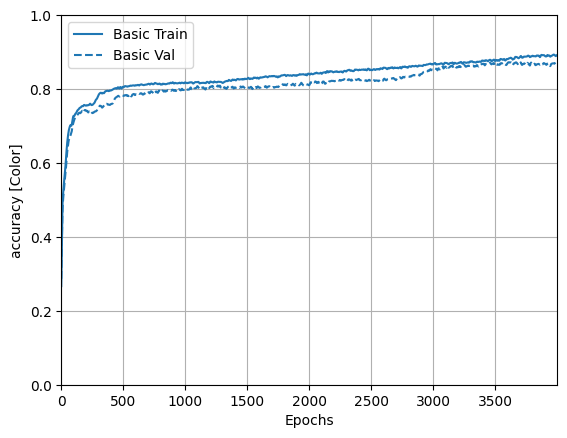

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

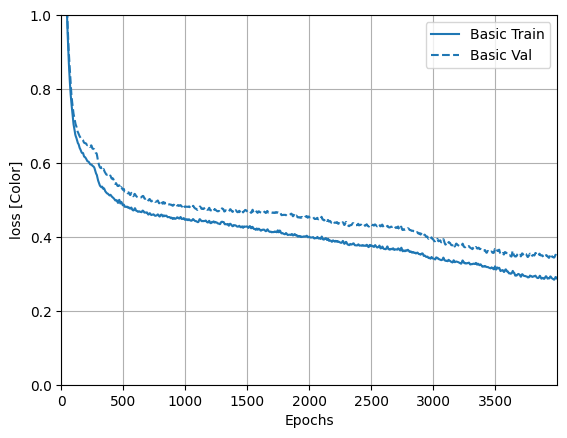

In [ ]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

In [ ]:
test_predictions = model.predict(test_dataset)
print("shape is {}".format(test_predictions.shape))
test_predictions

32/32 [==============================] - 0s 1ms/step
shape is (1010, 11)


array([[  -9.82629   ,  -20.346962  ,  -11.232532  , ...,  -11.545311  ,
         -54.947636  ,  -20.410103  ],
       [   7.052222  ,  -41.366413  ,  -46.47526   , ...,  -27.059025  ,
        -101.9382    ,  -37.496986  ],
       [ -32.57748   ,   -1.3449619 ,  -65.43505   , ...,   -9.138559  ,
         -62.18928   ,  -43.019814  ],
       ...,
       [ -13.8699255 ,   -0.7810451 ,   -4.439909  , ...,   -2.0432901 ,
           7.090575  ,  -23.501663  ],
       [ -14.060301  ,   -0.801489  ,   -4.5077662 , ...,   -1.8843516 ,
           7.0092897 ,  -23.600777  ],
       [ -14.631416  ,   -0.86282074,   -4.711326  , ...,   -1.407545  ,
           6.7654324 ,  -23.898119  ]], dtype=float32)

In [ ]:
#Selecting Class with highest confidence
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1) #Returns the indices of the maximum values along each row(axis=1)
#Converting numpy array to pandas dataframe
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Predicted Labels'])
predicted_encoded_test_labels


,Predicted Labels
0,5
1,0
2,7
3,5
4,1
...,...
1005,9
1006,9
1007,9
1008,9


In [ ]:
#Converting One-Hot Encoded Actual Test set labels into Label Encoding format
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1)
#Converting numpy array to pandas dataframe
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Actual Labels'])
actual_encoded_test_labels

,Actual Labels
0,5
1,5
2,7
3,5
4,1
...,...
1005,9
1006,9
1007,9
1008,9


In [ ]:
model.evaluate(x=test_dataset, y=test_labels)

32/32 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8851


[0.3469211459159851, 0.8851485252380371]

In [ ]:
#Classification Report
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predicted_encoded_test_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.78      0.91      0.84        46
       Green       0.94      0.96      0.95       305
        Blue       0.92      0.95      0.94       219
      Yellow       0.93      0.68      0.79        60
      Orange       0.89      0.63      0.74        38
        Pink       0.90      0.83      0.86       107
      Purple       0.85      0.84      0.85       108
       Brown       0.71      0.92      0.80        63
        Grey       0.75      0.73      0.74        41
       Black       0.93      1.00      0.96        13
       White       1.00      0.50      0.67        10

    accuracy                           0.89      1010
   macro avg       0.87      0.82      0.83      1010
weighted avg       0.89      0.89      0.88      1010



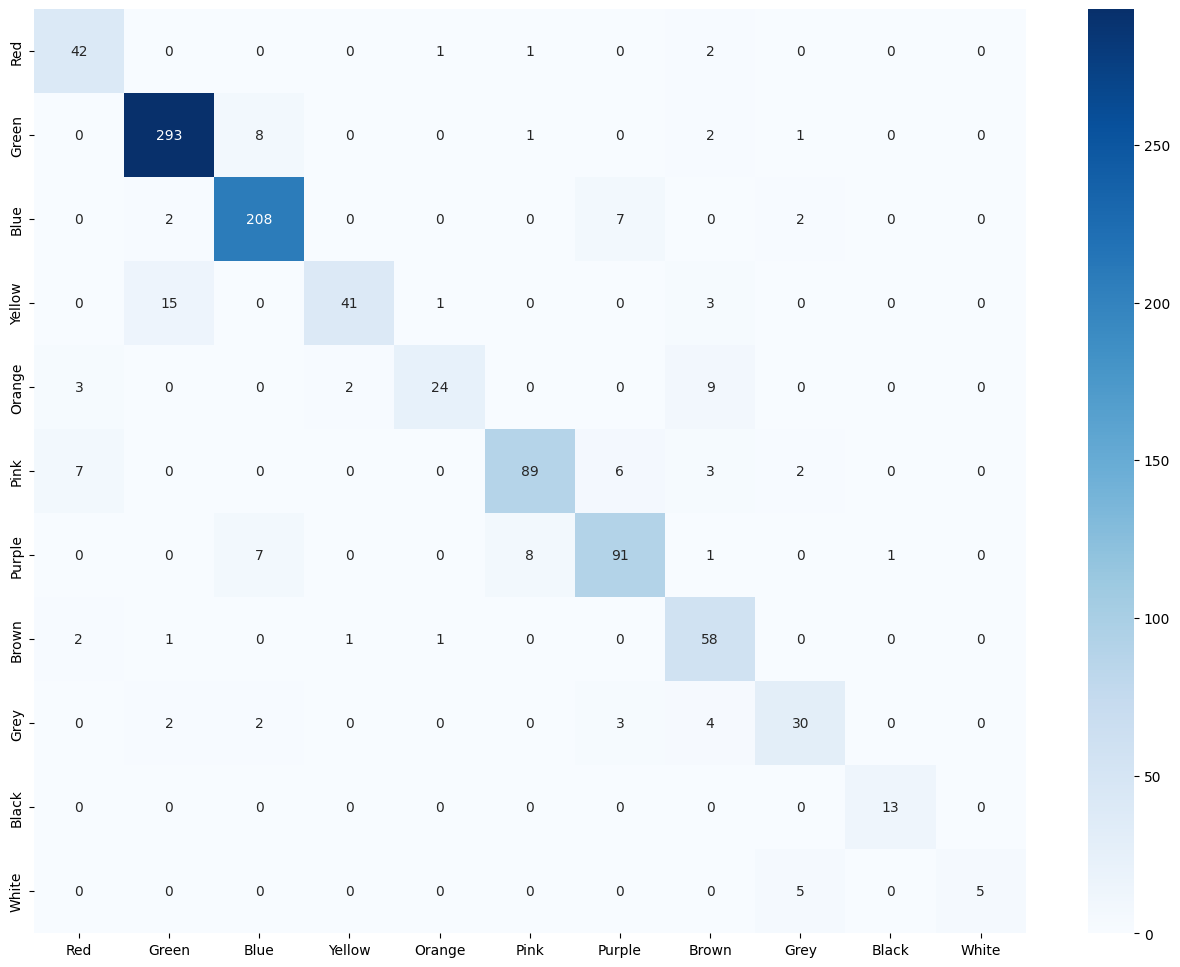

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()